### 1. What is Resume Screening?

Resume screening is the process of reviewing and evaluating job applicants' resumes to determine their suitability for a particular job position. It's typically one of the initial stages in the hiring process and involves assessing

### 2. Why do we need Resume Screening?

Resume screening is essential for identifying qualified candidates, ensuring compliance with legal requirements, optimizing resource allocation, and enhancing the candidate experience. It plays a crucial role in the recruitment process and contributes to the success of organizations in hiring the right talent for their needs.

## The various tasks at hand are as follows:
1. Exploratory Data Analysis
2. Data pre-processing
3. Data Modeling
4. Learining the top keywords across resumes.

### 1. Exploratory Data Analysis


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [6]:
df = pd.read_csv(r"Resume DataSet.csv")
df.iloc[0,1]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

In [3]:
df.shape

(962, 2)

### There are 962 observations we have in the data. Each observation represents the complete details of each candidate so we have 962 resumes for screening.

# 1. Exploratory Data Analysis (EDA)

In [4]:
category = df['Category'].value_counts().reset_index()
category

,index,Category
0,Java Developer,84
1,Testing,70
2,DevOps Engineer,55
3,Python Developer,48
4,Web Designing,45
5,HR,44
6,Hadoop,42
7,Blockchain,40
8,ETL Developer,40
9,Operations Manager,40


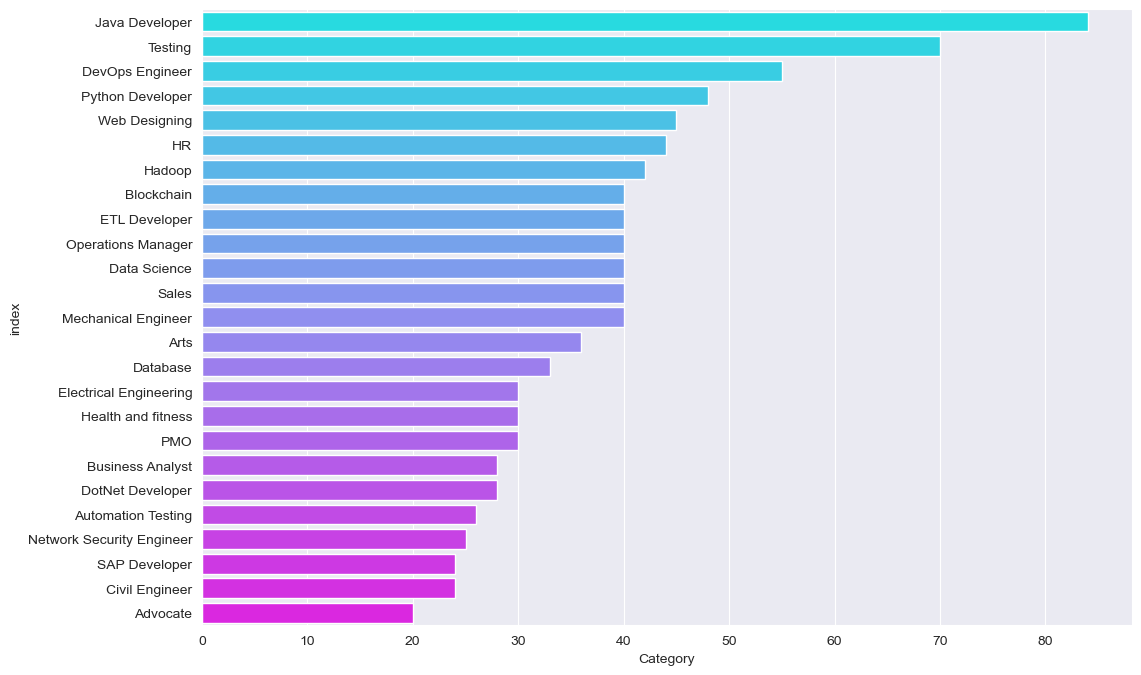

In [5]:
#Let’s see what different categories we have in the data.

plt.figure(figsize=(12,8))
sns.barplot(x=category['Category'], y=category['index'], palette='cool') # This parameter specifies the color palette to be used for the bars in the plot.
plt.show()

#### There are 25 different categories we have in the data.  The top 3 job categories we have in the data are as follows.

#### Java developer, Testing, and DevOps Engineer.

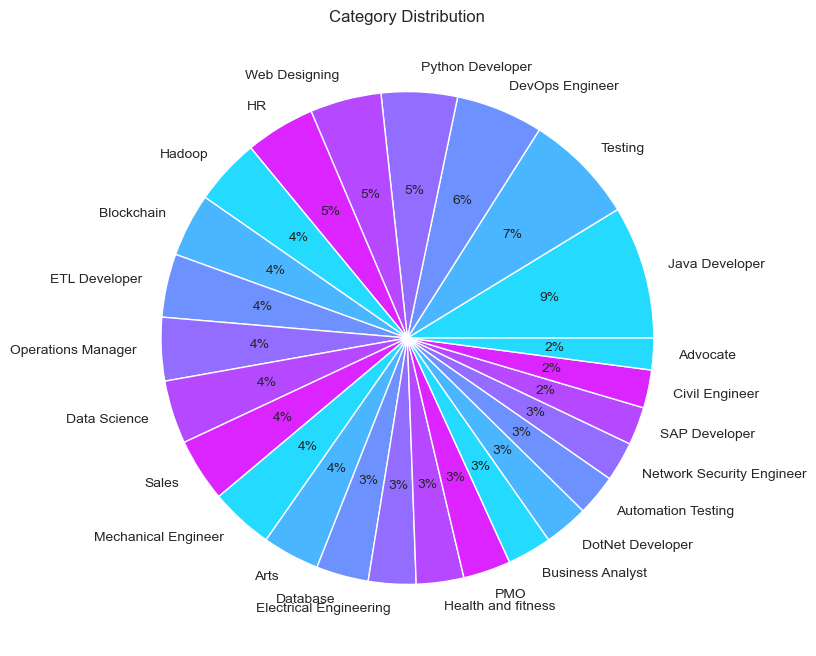

In [6]:
#Instead of the count or frequency, we can also visualize the distribution of job categories in percentage as below:

plt.figure(figsize=(12,8))
plt.pie(category['Category'], labels=category['index'],
        colors=sns.color_palette('cool'), autopct='%.0f%%') ## dispaly in percentage
plt.title('Category Distribution')
plt.show()

### 2. Data Pre-processing:
1. Data Cleaning
2. Data Encoding

#### Step 1: Cleaning the ‘Resume’ column
#### In this step we will remove any unnecessary information from resumes like URLs, hashtags, and special characters.

In [7]:
#Cleaning the ‘Resume’ column by removing all irrelevant or noisy elements 

def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) 
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText

In [8]:
#Passing resume column and calling the cleanResume function

df['cleaned'] = df['Resume'].apply(lambda x:cleanResume(x)) 
df.head()

,Category,Resume,cleaned
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...


In [9]:
#Creating a corpus by concatenating the contents of the "cleaned" column

corpus=" "
for i in range(0,len(df)):
    corpus= corpus+ df["cleaned"][i]

### Stopwords

In [10]:
# Importing the stopwords corpus from NLTK. Stopwords are common words (e.g., "the", "is", "and")
#that are often removed from text data during preprocessing because they usually do not carry significant meaning.

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
import string
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Tokenization

In [11]:
#Splitting the text into tokens

tokenizer = nltk.tokenize.RegexpTokenizer('\w+') ##\w matches any alphanumeric character and underscores
tokens = tokenizer.tokenize(corpus)
len(tokens)

411913

In [12]:
#now we shall make everything lowercase for uniformity
#to hold the new lower case words
words = []
# Looping through the tokens and make them lower case
for word in tokens:
    words.append(word.lower())
words[0:5]

['skills', 'programming', 'languages', 'python', 'pandas']

#### Step 2: Encoding ‘Category’

#### Now, we will encode the ‘Category’ column using Label Encoding. Even though the ‘Category’ column is ‘Nominal’ data we are using Label Encong because the ‘Category’ column is our ‘target’ column. By performing Label Encoding each category will become a class and we will be building a multiclass classification model.

In [13]:
#Encoding the categorical column

label = LabelEncoder()
df['new_Category'] = label.fit_transform(df['Category'])
df.head()

,Category,Resume,cleaned,new_Category
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...,6
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...,6
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...,6
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...,6
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...,6


### Step 3: Vectorization

#### Here we will preprocess and convert the ‘cleaned_resume’ column into vectors. There are many ways to do that like ‘Bag of Words’, ‘Tf-Idf’, ‘Word2Vec’ and a combination of these methods.

#### We will be using the ‘Tf-Idf’ method to get the vectors in this approach.

In [14]:
# Vectorizing the cleaned columns

text = df['cleaned'].values
target = df['new_Category'].values
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english',
    max_features=1500)
word_vectorizer.fit(text)
WordFeatures = word_vectorizer.transform(text)

In [15]:
WordFeatures.shape

(962, 1500)

### 3: Train Test Data and Modeling

#### We will be using the ‘One vs Rest’ method with ‘KNeighborsClassifier’ to build this multiclass classification model.

In [16]:
# Separate train and test data
X_train, X_test, y_train, y_test = train_test_split(WordFeatures, target, random_state=24, test_size=0.2)

In [17]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((769, 1500), (193, 1500), (769,), (193,))

### Training the model

In [18]:
model = OneVsRestClassifier(KNeighborsClassifier())
model.fit(X_train, y_train)

OneVsRestClassifier(estimator=KNeighborsClassifier())

In [19]:
# Prediction
y_pred = model.predict(X_test)

In [20]:
print(f'---------------------------------\n| Training Accuracy   :- {(model.score(X_train, y_train)*100).round(2)}% |')
print(f'---------------------------------\n| Test Accuracy :- {(model.score(X_test, y_test)*100).round(2)}% |\n---------------------------------')

---------------------------------
| Training Accuracy   :- 98.96% |
---------------------------------
| Test Accuracy :- 96.89% |
---------------------------------


#### We are able to classify each Category of a given resume with 98% and 96% accuracy.

#### We can also check the detailed classification report for each class or category.


In [21]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       1.00      1.00      1.00         9
           2       1.00      0.67      0.80         6
           3       1.00      1.00      1.00         9
           4       0.75      1.00      0.86         3
           5       1.00      1.00      1.00         3
           6       1.00      0.57      0.73         7
           7       1.00      1.00      1.00         6
           8       1.00      1.00      1.00        10
           9       1.00      1.00      1.00         6
          10       1.00      1.00      1.00        10
          11       0.80      1.00      0.89         8
          12       1.00      1.00      1.00         6
          13       1.00      1.00      1.00         6
          14       1.00      1.00      1.00         8
          15       1.00      1.00      1.00        16
          16       1.00      1.00      1.00         7
          17       1.00    

The model achieved perfect scores for precision, recall, and F1-score for each class, resulting in an accuracy of 97%. This indicates that the model performed exceptionally well on the dataset.

### 4. To learn the top keywords to analyze.

In [22]:
#Stop words are generally the most common words in a language.
#English stop words from nltk.
stopwords = nltk.corpus.stopwords.words('english')
words_new = []
#Now we need to remove the stop words from the words variable
#Appending to words_new all words that are in words but not in stopwords
for word in words:
    if word not in stopwords:
        words_new.append(word)

In [23]:
words_new[0:5]

['skills', 'programming', 'languages', 'python', 'pandas']

In [24]:
  import nltk
  nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\mihaq\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [25]:
# Perform Lemmatization

from nltk.stem import WordNetLemmatizer 
nltk.download('wordnet')
wn = WordNetLemmatizer() 
lem_words=[]
for word in words_new:
    word=wn.lemmatize(word)
    lem_words.append(word)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mihaq\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [26]:
lem_words[0:5]

['skill', 'programming', 'language', 'python', 'panda']

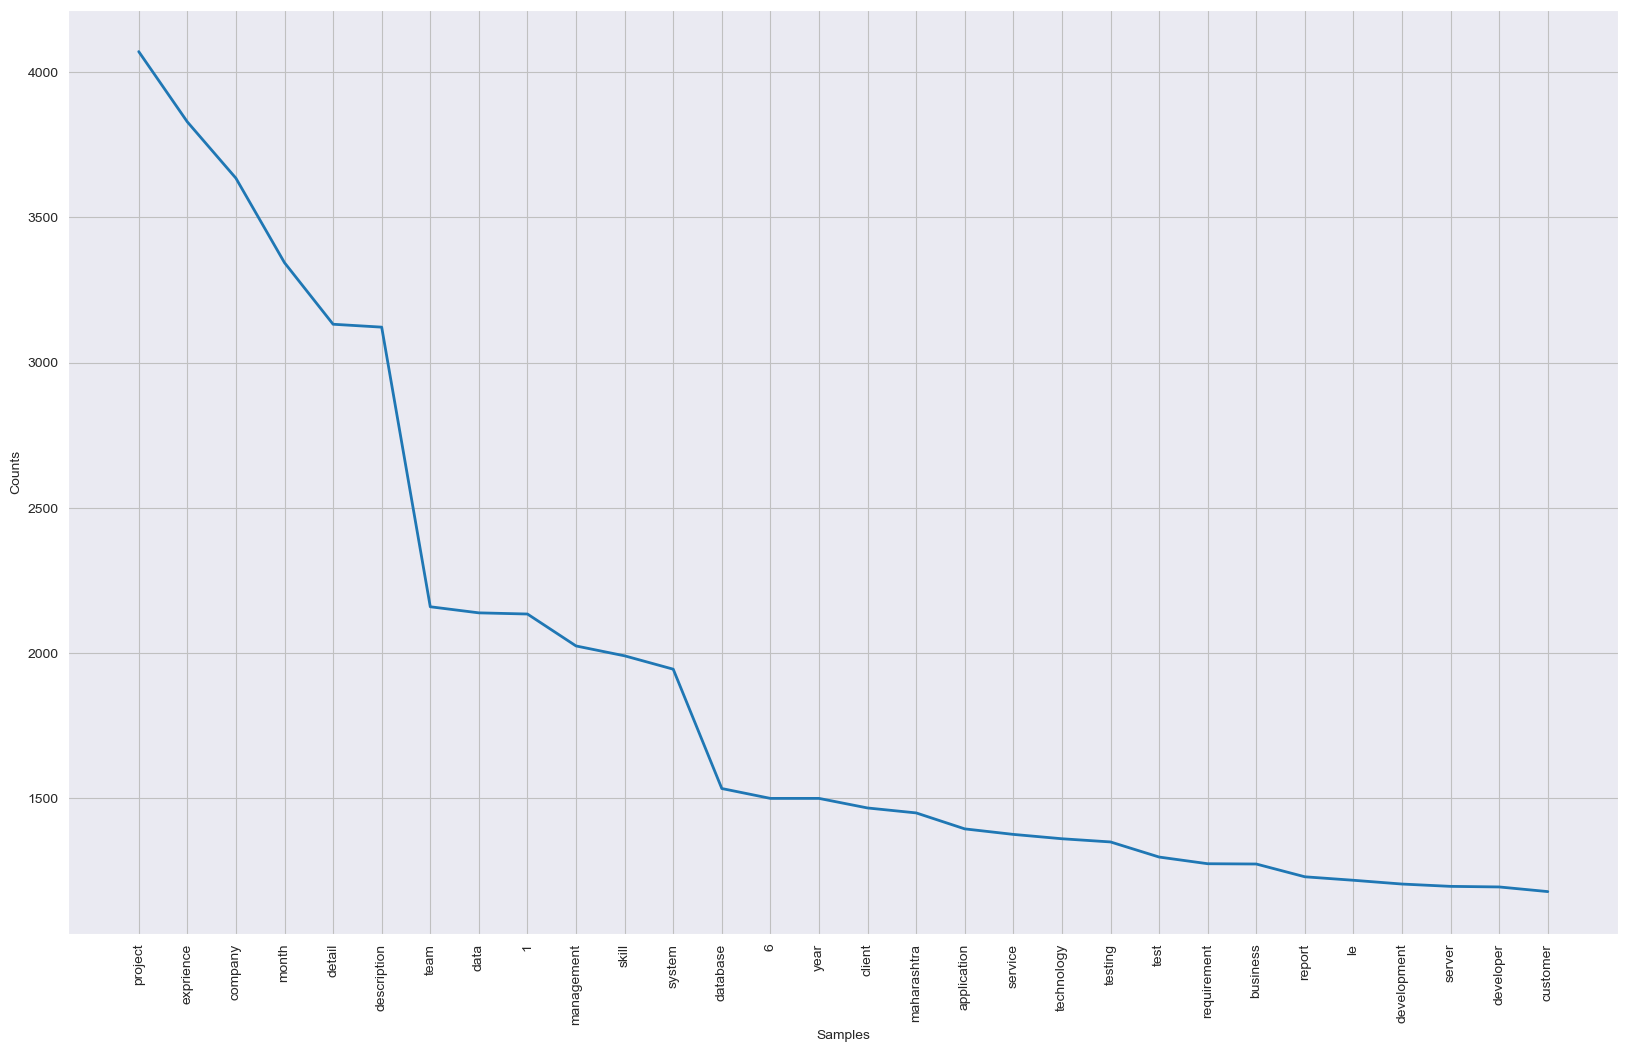

<Axes: xlabel='Samples', ylabel='Counts'>

In [27]:
#The frequency distribution of the words
freq_dist = nltk.FreqDist(lem_words)
#Frequency Distribution Plot
plt.subplots(figsize=(20,12))
freq_dist.plot(30)

In [28]:
# Now we generate wordcloud
res=' '.join([i for i in lem_words if not i.isdigit()])

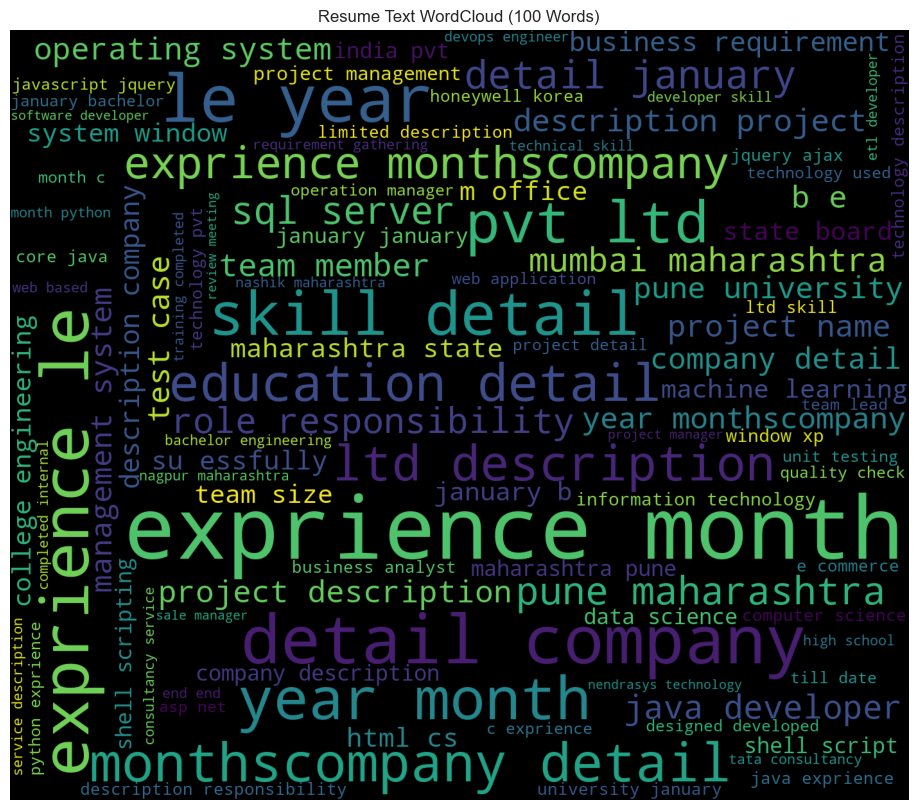

In [29]:
plt.subplots(figsize=(16,10))
wordcloud = WordCloud(
                          background_color='black',
                          max_words=100,
                          width=1400,
                          height=1200
                         ).generate(res)
plt.imshow(wordcloud)
plt.title('Resume Text WordCloud (100 Words)')
plt.axis('off')
plt.show()

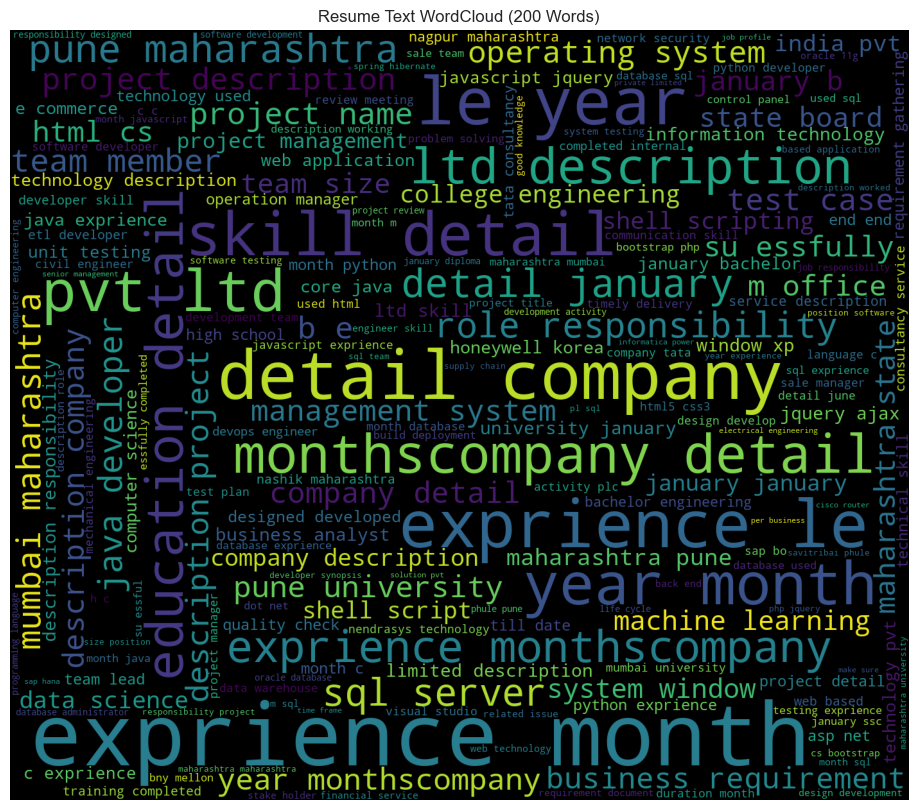

In [30]:
plt.subplots(figsize=(16,10))
wordcloud = WordCloud(
                          background_color='black',
                          max_words=200,
                          width=1400,
                          height=1200
                         ).generate(res)
plt.imshow(wordcloud)
plt.title('Resume Text WordCloud (200 Words)')
plt.axis('off')
plt.show()

### 5. Conclusion

### In this article, we learned how Natural Language Processing can be applied to improve our day-to-day life through the example of Resume Screening. We just classified almost 1000 resumes in few minutes into their respective categories with good accuracy.